In [24]:
%load_ext autoreload
%autoreload 2
import torch
from utils.dataset import image_data
from utils.model import UNetplusplus
from utils.train import model_setting
from matplotlib import pyplot as plt

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

data = image_data('./data/image_data/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
model = UNetplusplus(1,2)
train_model = model_setting(model,data,20,4,lr=1e-4,decay=1e-5)
train_model.dataset_split([0.8,0.15,0.05])

print('参数量',count_parameters(model))

参数量 1765574


In [26]:
torch.cuda.empty_cache()
train_model.train('./result/')

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [1/20], Loss: 1.4178631405035655, Accuracy: 0.878062195248074, Train Accuracy: 0.7532507578531901
save model


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [2/20], Loss: 0.9678643643856049, Accuracy: 0.8940642674763998, Train Accuracy: 0.850737194220225
save model


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [3/20], Loss: 1.331025414996677, Accuracy: 0.8850906160142686, Train Accuracy: 0.8710922996203104


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [4/20], Loss: 0.8554558124807146, Accuracy: 0.8835981157090929, Train Accuracy: 0.8769127031167349


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [5/20], Loss: 0.9870624608463712, Accuracy: 0.8832360373602973, Train Accuracy: 0.8856944541136423


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [6/20], Loss: 0.5724426723188825, Accuracy: 0.893693765004476, Train Accuracy: 0.8848097622394562


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [7/20], Loss: 0.7723012351327472, Accuracy: 0.8638593355814616, Train Accuracy: 0.8913040161132812


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [8/20], Loss: 0.748543918132782, Accuracy: 0.8861650360955132, Train Accuracy: 0.8917512396971384


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [9/20], Loss: 0.5069909476571612, Accuracy: 0.8916865984598795, Train Accuracy: 0.8945352435112


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [10/20], Loss: 0.5747433619366752, Accuracy: 0.895764085981581, Train Accuracy: 0.8970724940299988
save model


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [11/20], Loss: 0.5856738338867823, Accuracy: 0.879002571105957, Train Accuracy: 0.9029223124186198


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [12/20], Loss: 0.5241403232018153, Accuracy: 0.8797080251905653, Train Accuracy: 0.901865154504776


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [13/20], Loss: 0.6473675999376509, Accuracy: 0.8839652273390028, Train Accuracy: 0.9012854397296906


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [14/20], Loss: 0.5550521132018831, Accuracy: 0.8718402120802138, Train Accuracy: 0.9037130177021027


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [15/20], Loss: 0.7059433774815665, Accuracy: 0.8810732629564073, Train Accuracy: 0.9030178586641947


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [16/20], Loss: 0.5533085200521681, Accuracy: 0.8747146394517686, Train Accuracy: 0.901850163936615


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [17/20], Loss: 0.6603147039810816, Accuracy: 0.8714396158854166, Train Accuracy: 0.9054676095644633


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [18/20], Loss: 0.6561470958921645, Accuracy: 0.8785857624477811, Train Accuracy: 0.9046034415562948


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [19/20], Loss: 0.5642818229066001, Accuracy: 0.8766352335611979, Train Accuracy: 0.905423770348231


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [20/20], Loss: 0.5750259972280927, Accuracy: 0.8702310456169976, Train Accuracy: 0.9059386054674784


In [27]:
for i in train_model.best_model.named_parameters('outc_weight',recurse=False):
    print(i)

('outc_weight.outc_weight', Parameter containing:
tensor([0.9662, 0.9955, 0.9978, 1.0119], device='cuda:0', requires_grad=True))


In [ ]:
dummy_input = torch.randn(4, 1, 512, 512).cuda()

torch.onnx.export(model, dummy_input, "unetplusplus.onnx", verbose=True, input_names=['input'], output_names=['output'])

d:\Folder\Vscode\Git\Airflow organization prediction\.venv\lib\site-packages\torch\onnx\utils.py:702: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ..\torch\csrc\jit\passes\onnx\constant_fold.cpp:181.)
  _C._jit_pass_onnx_graph_shape_type_inference(
d:\Folder\Vscode\Git\Airflow organization prediction\.venv\lib\site-packages\torch\onnx\utils.py:1209: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ..\torch\csrc\jit\passes\onnx\constant_fold.cpp:181.)
  _C._jit_pass_onnx_graph_shape_type_inference(


In [ ]:
test_data = train_model.test_loader

In [5]:
test_model = UNetplusplus(1,2)
test_model = model_setting(test_model,data,100,2,lr=1e-3,decay=1e-5)
test_model.dataset_split([0.8,0.15,0.05])

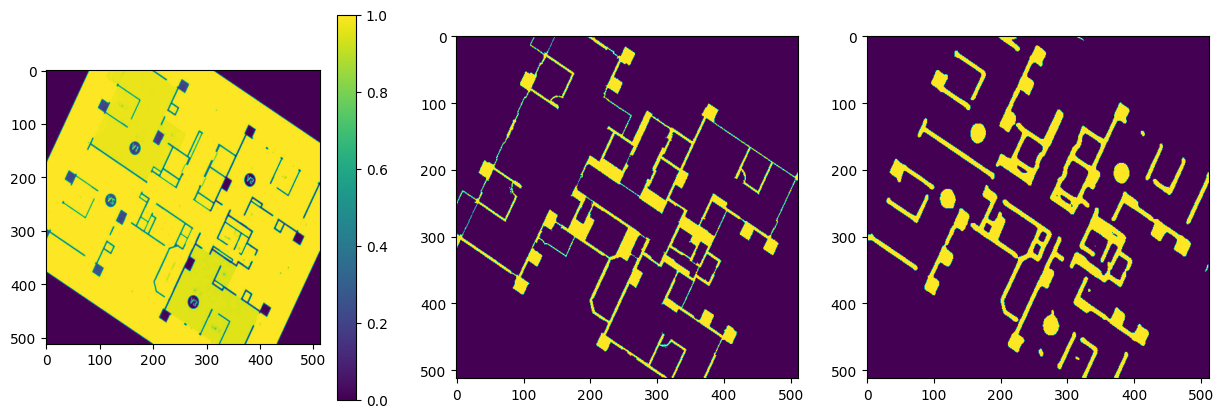

In [32]:
train_model.show_predict('val',path='./result/model_0.90.pth')